In [181]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# First thing we tried

-0.17080444665086608


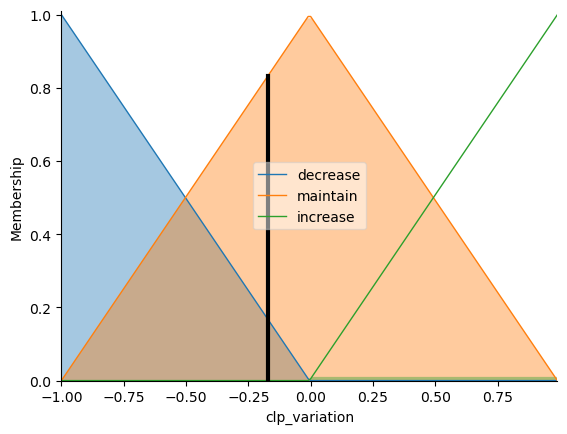

In [138]:
# Defining the input variables
memory_usage = ctrl.Antecedent(np.arange(0, 1, 0.01), 'memory_usage')
processor_load = ctrl.Antecedent(np.arange(0, 1, 0.01), 'processor_load')
output_bandwidth = ctrl.Antecedent(np.arange(0, 1, 0.01), 'output_bandwidth')
latency = ctrl.Antecedent(np.arange(0, 1000, 1), 'latency')
#input_network_throughput = ctrl.Antecedent(np.arange(0, 100, 1), 'input_network_throughput')
#output_network_throughput = ctrl.Antecedent(np.arange(0, 100, 1), 'output_network_throughput')


# Defining the output variable
clp_variation = ctrl.Consequent(np.arange(-1, 1, 0.01), 'clp_variation')

# Defining the membership functions for the input variables
# Note: The membership intervals and the terms used may vary depending on the specific problem
memory_usage.automf(3, names=['low', 'medium', 'high'])
processor_load.automf(3, names=['low', 'medium', 'high'])
#input_network_throughput.automf(3, names=['low', 'medium', 'high'])
#output_network_throughput.automf(3, names=['low', 'medium', 'high'])
output_bandwidth.automf(3, names=['low', 'medium', 'high'])
latency.automf(3, names=['low', 'medium', 'high'])

# Defining the membership functions for the output variable, 1st try
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -0.5, 0  ])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-0.5, 0   , 0.5])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0   , 0.5 , 1  ])

# Defining the membership functions for the output variable, 2nd try
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1, -1, 0])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-1, 0, 1])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0, 1, 1])

# Defining the membership functions for the output variable, 3rd try
clp_variation.automf(3, names=['decrease', 'maintain', 'increase'])


# Defining the rules
rule1a = ctrl.Rule(memory_usage['high'] | processor_load['high'], clp_variation['decrease'])
rule1a.weight = 3
rule1b = ctrl.Rule(memory_usage['low'] | processor_load['low'] , clp_variation['increase'])
rule1b.weight = 3     
rule1c = ctrl.Rule(memory_usage['low'] & processor_load['low'], clp_variation['increase'])
rule1c.weight = 3
rule1d = ctrl.Rule(memory_usage['medium'] & processor_load['medium'], clp_variation['maintain'])
rule1c.weight = 3

rule2a = ctrl.Rule(latency['high'] , clp_variation['increase'])
rule2a.weight = 2
rule2b = ctrl.Rule(latency['low'], clp_variation['decrease'])
rule2b.weight = 2
rule2c = ctrl.Rule(latency['medium'], clp_variation['maintain'])
rule2c.weight = 2

rule3a = ctrl.Rule(output_bandwidth['low'] , clp_variation['decrease'])
rule3a.weight = 1
rule3b = ctrl.Rule(output_bandwidth['high'], clp_variation['increase'])
rule3b.weight = 1
rule3c = ctrl.Rule(output_bandwidth['medium'], clp_variation['maintain'])
rule3c.weight = 1

# Creating the control system
clp_ctrl = ctrl.ControlSystem([rule1a, rule1b, rule1c, rule1d, rule2a, rule2b, rule2c, rule3a, rule3b, rule3c])


# Creating the simulator
clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)



# Testing our FIS


# Updating the variables
clp_simulator.input['memory_usage'] = 0.99 # 0.1
clp_simulator.input['processor_load'] = 0.99 # 0.1
#clp_simulator.input['input_network_throughput'] = 0.5
#clp_simulator.input['output_network_throughput'] = 0.4
clp_simulator.input['output_bandwidth'] = 0.5 # 0.1
clp_simulator.input['latency'] = 0.8 #200 / 1000


# Executing the simulation
clp_simulator.compute()

print(clp_simulator.output['clp_variation'])


# Checking the simulation result, and what it suggests
clp_variation.view(sim=clp_simulator)

# Using 3 levels on the output variable

Variables used:  ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']


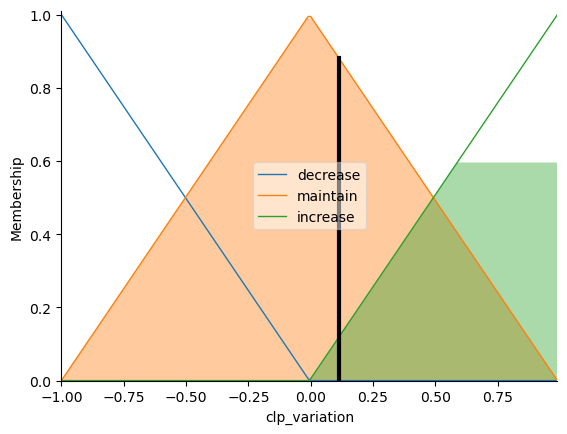

In [195]:
# Defining the variables you're using
variables_used = ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']
# Printing the variables you're using
print('Variables used: ', variables_used)
# Variables left out: 
# input_network_throughput, output_network_throughput

# Defining the ranges for each variable
ranges = {
    'memory_usage': np.arange(0, 1, 0.01),
    'processor_load': np.arange(0, 1, 0.01),
    'output_bandwidth': np.arange(0, 1, 0.01),
    'latency': np.arange(0, 1, 0.01),
    'input_network_throughput': np.arange(0, 1, 0.01),
    'output_network_throughput': np.arange(0, 1, 0.01)
}

# Defining the Antecedents
antecedents = {var: ctrl.Antecedent(ranges[var], var) for var in variables_used}

# Defining the output variable
clp_variation = ctrl.Consequent(np.arange(-1, 1, 0.01), 'clp_variation')

# Defining the membership functions for the input variables
for var in variables_used:
    antecedents[var].automf(3, names=['low', 'medium', 'high'])

    



# Specifically defining the membership function for memor

# Defining the membership functions for the output variable
clp_variation.automf(3, names=['decrease', 'maintain', 'increase'])


# Defining the rules
rules = [
    ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']),
    ctrl.Rule(antecedents['memory_usage']['low'] | antecedents['processor_load']['low'], clp_variation['increase']),
    ctrl.Rule(antecedents['memory_usage']['low'] & antecedents['processor_load']['low'], clp_variation['increase']),
    ctrl.Rule(antecedents['memory_usage']['medium'] & antecedents['processor_load']['medium'], clp_variation['maintain']),
    ctrl.Rule(antecedents['latency']['high'], clp_variation['increase']),
    ctrl.Rule(antecedents['latency']['low'], clp_variation['decrease']),
    ctrl.Rule(antecedents['latency']['medium'], clp_variation['maintain']),
    ctrl.Rule(antecedents['output_bandwidth']['low'], clp_variation['decrease']),
    ctrl.Rule(antecedents['output_bandwidth']['high'], clp_variation['increase']),
    ctrl.Rule(antecedents['output_bandwidth']['medium'], clp_variation['maintain'])
]

# Defining the weights for each rule
weights = [3, 3, 3, 2, 2, 2, 2, 1, 1, 1]
use_different_weights = True
# Assigning the weights to the rules
if use_different_weights == True:
    for rule, weight in zip(rules, weights):
        rule.weight = weight

# Creating the control system
clp_ctrl = ctrl.ControlSystem(rules)

# Creating the simulator
clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)

# Values that will be used for the simulation
values = {
    'memory_usage': 0.2,
    'processor_load': 0.2,
    'output_bandwidth': 0.5,
    'latency': 0.6,
    'input_network_throughput': 0.2,
    'output_network_throughput': 0.15
}
# Keeping only the values that will be used
values_used = [values[var] for var in variables_used]

# Updating the variables
for i,var in enumerate(variables_used):
    clp_simulator.input[var] = values_used[i] 

# Executing the simulation
clp_simulator.compute()

# Checking the simulation result, and what it suggests
clp_variation.view(sim=clp_simulator)


In [177]:
# Obtaining the final suggestion
print('Final suggestion: ', clp_simulator.output['clp_variation'])

Final suggestion:  0.11228494113322215


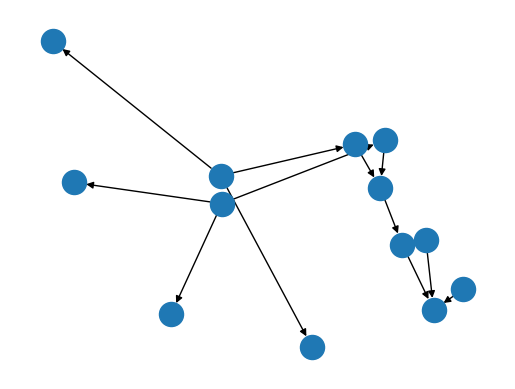

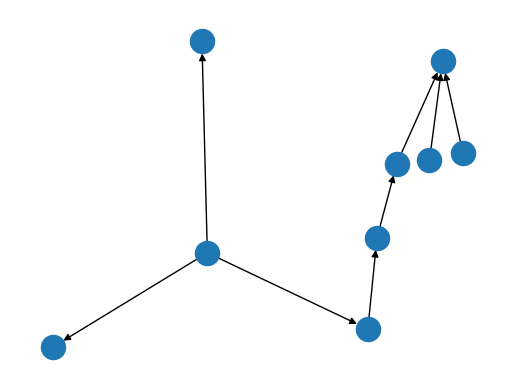

In [191]:
rules[0].view()
plt.show()

# instead, do the plot with labels
rule_to_see = rules[4]
# adding the labels
rule_to_see.label = 'If memory_usage is high or processor_load is high, then clp_variation is decrease'
rule_to_see.view()
plt.show()




# Using 2 levels on the output variable

Variables used:  ['memory_usage', 'processor_load']


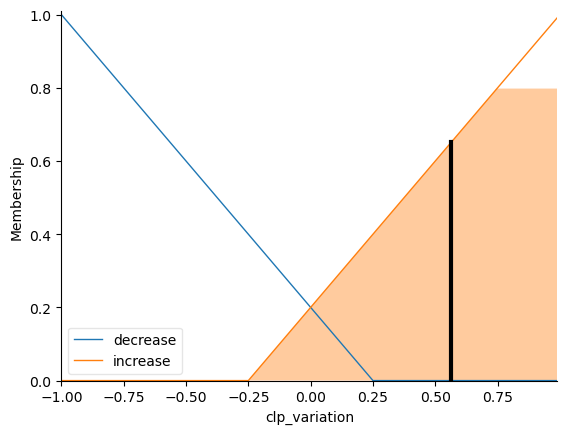

In [248]:
# Defining the variables you're using
#variables_used = ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']
variables_used = ['memory_usage', 'processor_load']
# Printing the variables you're using
print('Variables used: ', variables_used)
# Variables left out: 
# input_network_throughput, output_network_throughput

# Defining the ranges for each variable
ranges = {
    'memory_usage': np.arange(0, 1, 0.01),
    'processor_load': np.arange(0, 1, 0.01),
    'output_bandwidth': np.arange(0, 1, 0.01),
    'latency': np.arange(0, 1, 0.01),
    'input_network_throughput': np.arange(0, 1, 0.01),
    'output_network_throughput': np.arange(0, 1, 0.01)
}

# Defining the Antecedents
antecedents = {var: ctrl.Antecedent(ranges[var], var) for var in variables_used}

# Defining the output variable
clp_variation = ctrl.Consequent(np.arange(-1, 1, 0.01), 'clp_variation')

# Defining the membership functions for the input variables
for var in variables_used:
    antecedents[var].automf(3, names=['low', 'medium', 'high'])

    



# Specifically defining the membership function for memor

# Defining the membership functions for the output variable
disparity = 0.25
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -1, 0+disparity])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0-disparity, 1 , 1  ])


# Defining the rules
rules = []
if 'memory_usage' in variables_used and 'processor_load' in variables_used:
    rules.append(ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']))
    rules.append(ctrl.Rule(antecedents['memory_usage']['low'] | antecedents['processor_load']['low'], clp_variation['increase']))
if 'latency' in variables_used:
    rules.append(ctrl.Rule(antecedents['latency']['high'], clp_variation['increase']))
    rules.append(ctrl.Rule(antecedents['latency']['low'], clp_variation['decrease']))
if 'output_bandwidth' in variables_used:
    rules.append(ctrl.Rule(antecedents['output_bandwidth']['low'], clp_variation['decrease']))
    rules.append(ctrl.Rule(antecedents['output_bandwidth']['high'], clp_variation['increase']))

# Creating the control system
clp_ctrl = ctrl.ControlSystem(rules)

# Creating the simulator
clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)

# Values that will be used for the simulation
values = {
    'memory_usage': 0.2,
    'processor_load': 0.1,
    'output_bandwidth': 0.5, # 0.5
    'latency': 0.6, # 0.6
    'input_network_throughput': 0.2,
    'output_network_throughput': 0.15
}
# Keeping only the values that will be used
values_used = [values[var] for var in variables_used]

# Updating the variables
for i,var in enumerate(variables_used):
    clp_simulator.input[var] = values_used[i] 

# Executing the simulation
clp_simulator.compute()

# Checking the simulation result, and what it suggests
clp_variation.view(sim=clp_simulator)


In [225]:
# Obtaining the final suggestion
print('Final suggestion: ', clp_simulator.output['clp_variation'])

Final suggestion:  0.5634418220954991


# As a function

In [249]:
# this function will receive the values of the variables, and return the suggestion (including the plot and numeric value of CLP variation)
def get_suggestion(values, variables_used, disparity=0.25, plot=True):
    # Defining the ranges for each variable
    ranges = {
        'memory_usage': np.arange(0, 1, 0.01),
        'processor_load': np.arange(0, 1, 0.01),
        'output_bandwidth': np.arange(0, 1, 0.01),
        'latency': np.arange(0, 1, 0.01),
        'input_network_throughput': np.arange(0, 1, 0.01),
        'output_network_throughput': np.arange(0, 1, 0.01)
    }

    # Defining the Antecedents
    antecedents = {var: ctrl.Antecedent(ranges[var], var) for var in variables_used}

    # Defining the output variable
    clp_variation = ctrl.Consequent(np.arange(-1, 1, 0.01), 'clp_variation')

    # Defining the membership functions for the input variables
    for var in variables_used:
        antecedents[var].automf(3, names=['low', 'medium', 'high'])

    # Specifically defining the membership function for memor

    # Defining the membership functions for the output variable
    clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -1, 0+disparity])
    clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0-disparity, 1 , 1  ])

    # Defining the rules
    rules = []
    if 'memory_usage' in variables_used and 'processor_load' in variables_used:
        rules.append(ctrl.Rule(antecedents['memory_usage']['high'] | antecedents['processor_load']['high'], clp_variation['decrease']))
        rules.append(ctrl.Rule(antecedents['memory_usage']['low'] | antecedents['processor_load']['low'], clp_variation['increase']))
    if 'latency' in variables_used:
        rules.append(ctrl.Rule(antecedents['latency']['high'], clp_variation['increase']))
        rules.append(ctrl.Rule(antecedents['latency']['low'], clp_variation['decrease']))
    if 'output_bandwidth' in variables_used:
        rules.append(ctrl.Rule(antecedents['output_bandwidth']['low'], clp_variation['decrease']))
        rules.append(ctrl.Rule(antecedents['output_bandwidth']['high'], clp_variation['increase']))
    
    # Creating the control system
    clp_ctrl = ctrl.ControlSystem(rules)

    # Creating the simulator
    clp_simulator = ctrl.ControlSystemSimulation(clp_ctrl)

    # Keeping only the values that will be used
    values_used = [values[var] for var in variables_used]

    # Updating the variables
    for i,var in enumerate(variables_used):
        clp_simulator.input[var] = values_used[i]
    
    # Executing the simulation
    clp_simulator.compute()

    # Checking the simulation result, and what it suggests
    if plot == True:
        clp_variation.view(sim=clp_simulator)
    
    # Obtaining the final suggestion
    suggestion = clp_simulator.output['clp_variation']

    return suggestion

/home/caria/anaconda3/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


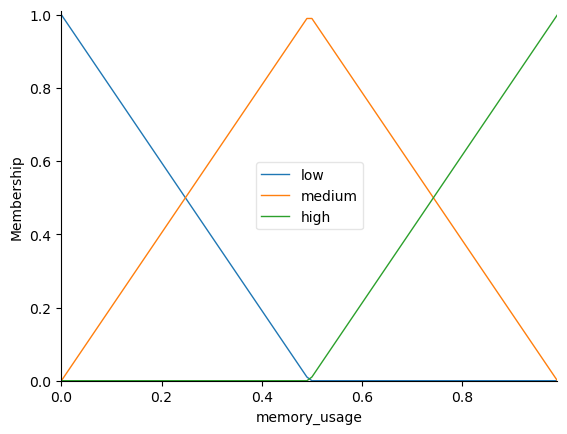

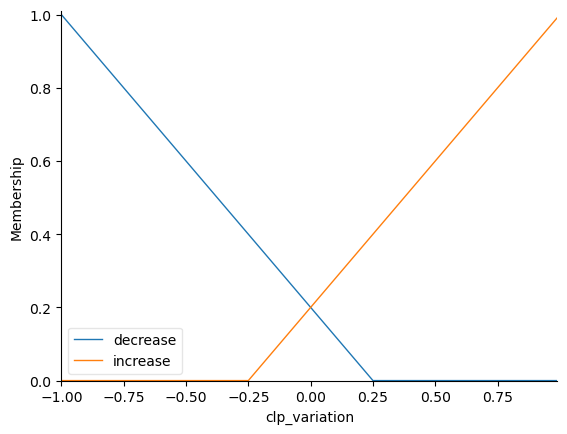

In [318]:
memory_usage.view()
clp_variation.view()

In [271]:
# Getting the values from the csv dataset
import pandas as pd
df = pd.read_csv('Project2_SampleData.csv')
df

# for loop on all instances
#for later


,MemoryUsage,ProcessorLoad,InpNetThroughput,OutNetThroughput,OutBandwidth,Latency,V_MemoryUsage,V_ProcessorLoad,V_InpNetThroughput,V_OutNetThroughput,V_OutBandwidth,V_Latency,CLPVariation
0,0.68,0.60,0.65,0.70,0.72,0.80,0.45,0.52,0.50,0.48,0.45,0.48,0.73
1,0.65,0.95,0.87,0.75,0.88,0.53,0.60,0.52,0.50,0.52,0.48,0.52,-0.82
2,0.68,0.60,0.60,0.65,0.74,0.40,0.45,0.52,0.50,0.48,0.46,0.48,0.12
3,1.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,0.50,0.50,0.50,0.50,-0.85
4,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50
5,0.65,0.50,0.70,0.23,0.80,1.00,0.40,0.45,0.51,0.45,0.30,0.55,0.80
6,0.83,0.78,0.87,0.78,0.20,0.50,0.59,0.45,0.55,0.52,0.49,0.52,-0.31
7,0.83,0.78,0.78,0.79,0.78,0.50,0.45,0.53,0.56,0.48,0.46,0.48,-0.65
8,0.39,0.42,0.73,0.62,0.78,0.50,0.56,0.67,0.58,0.55,0.52,0.60,0.85
9,0.20,0.10,0.20,0.15,0.50,0.60,0.56,0.67,0.58,0.55,0.52,0.60,0.85


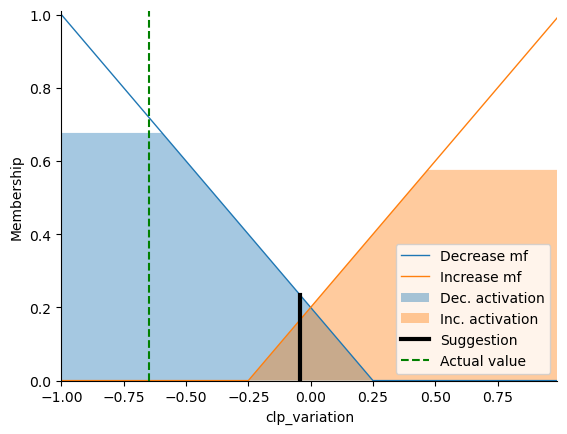

Suggestion:  -0.041150939751573794  Actual value:  -0.65


In [316]:
# Utilizing the function to get the suggestion for one instance

# Updating the variable values for this instance
instance = 7
values = {
    'memory_usage': df['MemoryUsage'][instance],
    'processor_load': df['ProcessorLoad'][instance],
    'output_bandwidth': df['OutBandwidth'][instance],
    'latency': df['Latency'][instance],
    'input_network_throughput': df['InpNetThroughput'][instance],
    'output_network_throughput': df['OutNetThroughput'][instance]
}

variables_used = ['memory_usage', 'processor_load', 'output_bandwidth', 'latency']


suggestion = get_suggestion(values, variables_used, disparity=0.25, plot=True)
# add the actual value to the plot
plt.axvline(x=df['CLPVariation'][instance], color='g', linestyle='--')
plt.legend(['Decrease mf', 'Increase mf', 'Dec. activation', 'Inc. activation', 'Suggestion', 'Actual value'])
plt.show()

# Comparing the suggestion with the actual value
print('Suggestion: ', suggestion, ' Actual value: ', df['CLPVariation'][instance])

Example of how to create an "over time" FIS: